# Optional Lab: Python, NumPy and Vectorization
A brief introduction to some of the scientific computing used in this course. In particular the NumPy scientific computing package and its use with python.


In [ ]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt

## 1.1 Goals
In this lab, you will:
- Review the features of PyTorch distributions that are used in Course 1

## 1.2 Useful References
- List of [PyTorch distributions](https://pytorch.org/docs/stable/distributions.html)
- A challenging feature topic: [NumPy Broadcasting](https://NumPy.org/doc/stable/user/basics.broadcasting.html)


# 2 Python and PyTorch <a name='Python and NumPy'></a>
Python is the programming language we will be using in this course. It has a set of numeric data types and arithmetic operations. NumPy is a library that extends the base capabilities of python to add a richer data set including more numeric types, vectors, matrices, and many matrix functions. NumPy and python  work together fairly seamlessly. Python arithmetic operators work on NumPy data types and many NumPy functions will accept python data types.


# 3 Distributions

## 3.1 Abstract
<img align="right" src="./images/C1_W2_Lab04_Vectors.PNG" style="width:340px;" >Vectors, as you will use them in this course, are ordered arrays of numbers. In notation, vectors are denoted with lower case bold letters such as $\mathbf{x}$.  The elements of a vector are all the same type. A vector does not, for example, contain both characters and numbers. The number of elements in the array is often referred to as the *dimension* though mathematicians may prefer *rank*. The vector shown has a dimension of $n$. The elements of a vector can be referenced with an index. In math settings, indexes typically run from 1 to n. In computer science and these labs, indexing will typically run from 0 to n-1.  In notation, elements of a vector, when referenced individually will indicate the index in a subscript, for example, the $0^{th}$ element, of the vector $\mathbf{x}$ is $x_0$. Note, the x is not bold in this case.  


## 3.2 PyTorch Distributions

NumPy's basic data structure is an indexable, n-dimensional *array* containing elements of the same type (`dtype`). Right away, you may notice we have overloaded the term 'dimension'. Above, it was the number of elements in the vector, here, dimension refers to the number of indexes of an array. A one-dimensional or 1-D array has one index. In Course 1, we will represent vectors as NumPy 1-D arrays. 

 - 1-D array, shape (n,): n elements indexed [0] through [n-1]
 

Distributions are created by providing parameter values to a given distribution from a list of [PyTorch distributions](https://pytorch.org/docs/stable/distributions.html). Below are examples of creating some popular continuous and discrete distributions.

### Continuous Distributions

[**Normal Distribution**](https://pytorch.org/docs/stable/distributions.html#normal)

$$\mathrm{Normal}(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}\exp \left( {-\frac{(x-\mu)^2}{2 \sigma^2}} \right)$$
$$\mu \in \mathbb{R}$$
$$\sigma \in \mathbb{R}_{\gt 0}$$

Distribution creation


In [ ]:
# Normal distribution is parameterized by loc (mean) and scale (standard deviation)
normal = dist.Normal(loc=torch.tensor(0.0), scale=torch.tensor(1.0))
print("normal = dist.Normal(loc=torch.tensor(0.0), scale=torch.tensor(1.0))")
print(f"normal.loc = {normal.loc}")
print(f"normal.scale = {normal.scale}")

# loc parameter is constrained to be real-valued and scale is constrained to be positive-valued
print(f"normal.arg_constraints['loc'] = {normal.arg_constraints['loc']}")
print(f"normal.arg_constraints['scale'] = {normal.arg_constraints['scale']}")

# Normal distribution supports real-valued random variables
print(f"normal.support = {normal.support}")

normal = dist.Normal(loc=torch.tensor(0.0), scale=torch.tensor(1.0))
normal.loc = 0.0
normal.scale = 1.0
normal.arg_constraints['loc'] = Real()
normal.arg_constraints['scale'] = GreaterThan(lower_bound=0.0)
normal.support = Real()


In [ ]:
# parameters must be within constraints or they will produce an error
try:
    normal = dist.Normal(loc=0.0, scale=-1.0)
except Exception as e:
    print("The error message you'll see is:")
    print(e)

The error message you'll see is:
Expected parameter scale (Tensor of shape ()) of distribution Normal(loc: 0.0, scale: -1.0) to satisfy the constraint GreaterThan(lower_bound=0.0), but found invalid values:
-1.0


Properties

$$\mathrm{mean} = \mu$$
$$\mathrm{mode} = \mu$$
$$\mathrm{stddev} = \sigma$$
$$\mathrm{variance} = \sigma^2$$

In [ ]:
# distribution properties
print(f"normal.mean = {normal.mean}")
print(f"normal.mode = {normal.mode}")
print(f"normal.stddev = {normal.stddev}")
print(f"normal.variance = {normal.variance}")

normal.mean = 0.0
normal.mode = 0.0
normal.stddev = 1.0
normal.variance = 1.0


Sampling

$$x \sim \mathrm{Normal}(\mu,\,\sigma)$$
$$x \in \mathbb{R}$$

In [ ]:
# sample values are within this support
print(f"normal.support = {normal.support}")
# run this multiple times - each time you will get different random values
sample = normal.sample()
print(f"normal.sample() = {sample}")

normal.support = Real()
normal.sample() = 0.1779175102710724


Text(0, 0.5, 'density')

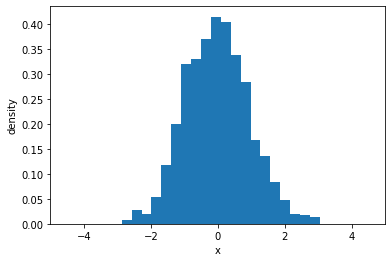

In [ ]:
samples = normal.sample(sample_shape=(1000,))
plt.hist(samples, bins=20, density=True)
plt.xlim(-5, 5)
plt.xlabel("x")
plt.ylabel("density")

Probability density function

$$\mathrm{Normal}(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}\exp \left( {-\frac{(x-\mu)^2}{2 \sigma^2}} \right)$$

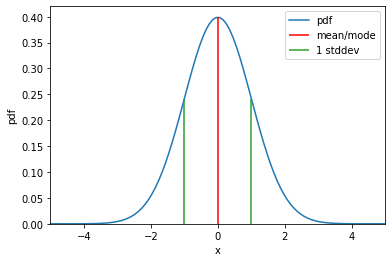

In [ ]:
# Values of x are within support
x = torch.linspace(-5, 5, 100)

# Take exponent of log_prob to get pdf
normal_pdf = normal.log_prob(x).exp()
plt.plot(x, normal_pdf, label="pdf")

# Plot mean and mode
plt.vlines(normal.mean, ymin=0, ymax=normal.log_prob(normal.mean).exp(), colors="r", label="mean/mode")
plt.vlines(normal.scale, ymin=0, ymax=normal.log_prob(normal.scale).exp(), colors="C2", label="1 stddev")
plt.vlines(-normal.scale, ymin=0, ymax=normal.log_prob(normal.scale).exp(), colors="C2")

plt.xlabel("x")
plt.ylabel("pdf")
plt.xlim(-5, 5)
plt.ylim(0, 0.42)
plt.legend()
plt.show()

Cumulative density function

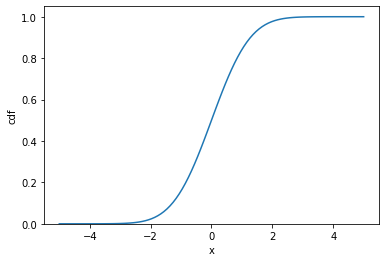

In [ ]:
normal_cdf = normal.cdf(x)
plt.plot(x, normal_cdf)

plt.xlabel("x")
plt.ylabel("cdf")
plt.ylim(0)
plt.show()

[**Gamma Distribution**](https://pytorch.org/docs/stable/distributions.html#gamma)

Distribution creation

$$\mathrm{Gamma}(x \mid \alpha, \, \beta)$$
$$\alpha \in \mathbb{R}_{\gt 0}$$
$$\beta \in \mathbb{R}_{\gt 0}$$

In [ ]:
# Gamma distribution is parameterized by concentration (alpha) and rate (beta)
gamma = dist.Gamma(concentration=torch.tensor(10.0), rate=torch.tensor(2.0))
print("gamma = dist.Gamma(concentration=torch.tensor(10.0), rate=torch.tensor(2.0))")
print(f"gamma.concentration = {gamma.concentration}  # alpha")
print(f"gamma.rate = {gamma.rate}            # beta")

# concentration and rate parameters are constrained to be positive-valued
print(f"gamma.arg_constraints['concentration'] = {gamma.arg_constraints['concentration']}")
print(f"gamma.arg_constraints['rate'] = {gamma.arg_constraints['rate']}")

# Gamma distribution supports positive-valued random variables
print(f"gamma.support = {gamma.support}")

gamma = dist.Gamma(concentration=torch.tensor(10.0), rate=torch.tensor(2.0))
gamma.concentration = 10.0  # alpha
gamma.rate = 2.0            # beta
gamma.arg_constraints['concentration'] = GreaterThan(lower_bound=0.0)
gamma.arg_constraints['rate'] = GreaterThan(lower_bound=0.0)
gamma.support = GreaterThanEq(lower_bound=0.0)


Properties

$$\mathrm{mean} = \frac{\alpha}{\beta}$$
$$\mathrm{mode} = \frac{\alpha - 1}{\beta}$$
$$\mathrm{stddev} = \sqrt{\frac{\alpha}{\beta^2}}$$
$$\mathrm{variance} = \frac{\alpha}{\beta^2}$$

In [ ]:
# distribution properties
print(f"gamma.mean = {gamma.mean}")
print(f"gamma.mode = {gamma.mode}")
print(f"gamma.stddev = {gamma.stddev}")
print(f"gamma.variance = {gamma.variance}")

gamma.mean = 5.0
gamma.mode = 4.5
gamma.stddev = 1.5811388492584229
gamma.variance = 2.5


Sampling

$$x \sim \mathrm{Gamma}(\alpha,\,\beta)$$
$$x \in \mathbb{R}_{\gt 0}$$

In [ ]:
# sample values are within this support
print(f"gamma.support = {gamma.support}")
# run this multiple times - each time you will get different random values
sample = gamma.sample()
print(f"gamma.sample() = {sample}")

gamma.support = GreaterThanEq(lower_bound=0.0)
gamma.sample() = 2.986645460128784


Text(0, 0.5, 'density')

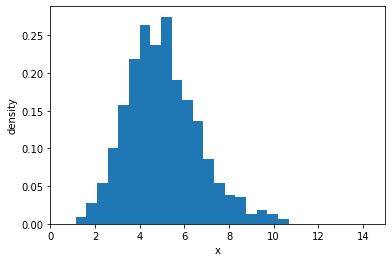

In [ ]:
samples = gamma.sample(sample_shape=(1000,))
plt.hist(samples, bins=20, density=True)
plt.xlim(0, 15)
plt.xlabel("x")
plt.ylabel("density")

Probability density function

$$\mathrm{Gamma}(x \mid \alpha, \, \beta) = \frac{\beta^\alpha}{\Gamma (\alpha)}x ^{\alpha-1} e^{-\beta x}$$

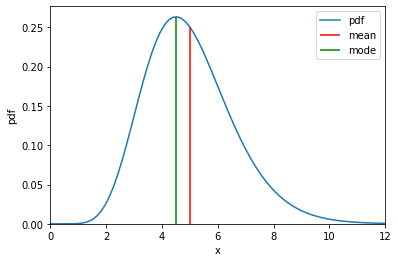

In [ ]:
# Define values of x within support
x = torch.linspace(0, 15, 100)

# Take exponent of log_prob to get pdf
gamma_pdf = gamma.log_prob(x).exp()
plt.plot(x, gamma_pdf, label="pdf")

# Plot mean and mode
plt.vlines(gamma.mean, ymin=0, ymax=gamma.log_prob(gamma.mean).exp(), colors="r", label="mean")
plt.vlines(gamma.mode, ymin=0, ymax=gamma.log_prob(gamma.mode).exp(), colors="g", label="mode")

plt.xlabel("x")
plt.ylabel("pdf")
plt.xlim(0, 12)
plt.ylim(0)
plt.legend()
plt.show()

[**Beta Distribution**](https://pytorch.org/docs/stable/distributions.html#beta)

$$\mathrm{Beta}(x \mid \alpha, \, \beta)$$

**Delta Distribution**

[**Poisson Distribution**](https://pytorch.org/docs/stable/distributions.html#poisson)

Distribution creation

$$\mathrm{Poisson}(x \mid \lambda)$$
$$\lambda \in \mathbb{R}_{\gt 0}$$

In [ ]:
# Poisson distribution is parameterized by rate (lambda)
poisson = dist.Poisson(rate=torch.tensor(5.0))
print("poisson = dist.Poisson(rate=torch.tensor(5.0))")
print(f"poisson.rate = {poisson.rate}            # lambda")

# rate parameter is constrained to be positive-valued
print(f"poisson.arg_constraints['rate'] = {poisson.arg_constraints['rate']}")

# Poisson distribution supports nonnegative-integer random variables
print(f"poisson.support = {poisson.support}")

poisson = dist.Poisson(rate=torch.tensor(5.0))
poisson.rate = 5.0            # lambda
poisson.arg_constraints['rate'] = GreaterThanEq(lower_bound=0.0)
poisson.support = IntegerGreaterThan(lower_bound=0)


Properties

$$\mathrm{mean} = \lambda$$
$$\mathrm{mode} = \lambda$$
$$\mathrm{stddev} = \sqrt{\lambda}$$
$$\mathrm{variance} = \lambda$$

In [ ]:
# distribution properties
print(f"poisson.mean = {poisson.mean}")
print(f"poisson.mode = {poisson.mode}")
print(f"poisson.stddev = {poisson.stddev}")
print(f"poisson.variance = {poisson.variance}")

poisson.mean = 5.0
poisson.mode = 5.0
poisson.stddev = 2.2360680103302
poisson.variance = 5.0


Sampling

$$x \sim \mathrm{Poisson}(\lambda)$$
$$x \in \mathbb{Z}_{\ge 0}$$

In [ ]:
# sample values are within this support
print(f"poisson.support = {poisson.support}")
# run this multiple times - each time you will get different random values
sample = poisson.sample()
print(f"poisson.sample() = {sample}")

poisson.support = IntegerGreaterThan(lower_bound=0)
poisson.sample() = 5.0


Text(0, 0.5, 'density')

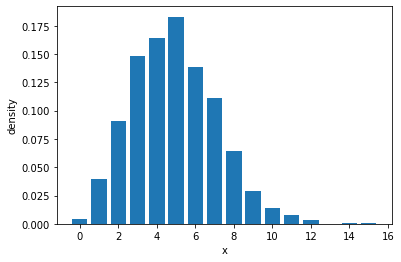

In [ ]:
samples = poisson.sample(sample_shape=(1000,))
sample_values, sample_counts = torch.unique(samples, return_counts=True)
plt.bar(sample_values, sample_counts / 1000)
plt.xlabel("x")
plt.ylabel("density")

Probability density function

$$\mathrm{Poisson}(x \mid \lambda) = \lambda^x \frac{e^{-\lambda}}{x!}$$

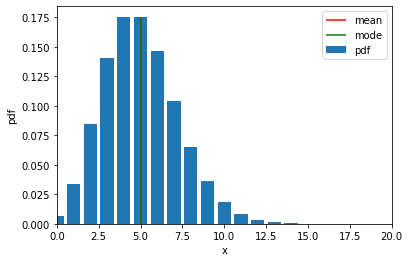

In [ ]:
# Define values of x within support
x = torch.arange(0, 20)

# Take exponent of log_prob to get pdf
poisson_pdf = poisson.log_prob(x).exp()
plt.bar(x, poisson_pdf, label="pdf")

# Plot mean and mode
plt.vlines(poisson.mean, ymin=0, ymax=poisson.log_prob(poisson.mean).exp(), colors="r", label="mean")
plt.vlines(poisson.mode, ymin=0, ymax=poisson.log_prob(poisson.mode).exp(), colors="g", label="mode")

plt.xlabel("x")
plt.ylabel("pdf")
plt.xlim(0, 20)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
# NumPy routines which allocate memory and fill arrays with value
try:
    bernoulli = dist.Bernoulli(probs=0.3, logits=0)
except Exception as e:
    print("The error message you'll see is:")
    print(e)

The error message you'll see is:
Either `probs` or `logits` must be specified, but not both.


[**Bernoulli Distribution**](https://pytorch.org/docs/stable/distributions.html#bernoulli)

Distribution creation

$$\mathrm{Bernoulli}(x \mid p)$$
$$p \in [0, 1]$$

or alternatively by logit(p)

$$\mathrm{Bernoulli}(x \mid \mathrm{logit}(p))$$
where
$$\mathrm{logit}(p) = \log \frac{p}{1-p}$$

In [ ]:
# Bernoulli distribution is parameterized by probs (p)
bernoulli_probs = dist.Bernoulli(probs=torch.tensor(0.3))
print("bernoulli_probs = dist.Bernoulli(probs=torch.tensor(0.3))")
print(f"bernoulli_probs.probs = {bernoulli_probs.probs}            # p")
print(f"bernoulli_probs.logits = {bernoulli_probs.logits}            # logit(p)")

# Verify logit(p)
print(f"logit(p) = {torch.log(bernoulli_probs.probs / (1 - bernoulli_probs.probs))}")

# rate parameter is constrained to be positive-valued
print(f"bernoulli_probs.arg_constraints['probs'] = {bernoulli_probs.arg_constraints['probs']}")
print(f"bernoulli_probs.arg_constraints['logits'] = {bernoulli_probs.arg_constraints['logits']}")

# Bernoulli distribution supports binary random variables
print(f"bernoulli_probs.support = {bernoulli_probs.support}")

bernoulli_probs = dist.Bernoulli(probs=torch.tensor(0.3))
bernoulli_probs.probs = 0.30000001192092896            # p
bernoulli_probs.logits = -0.8472978472709656            # logit(p)
logit(p) = -0.8472977876663208
bernoulli_probs.arg_constraints['probs'] = Interval(lower_bound=0.0, upper_bound=1.0)
bernoulli_probs.arg_constraints['logits'] = Real()
bernoulli_probs.support = Boolean()


In [ ]:
# Bernoulli distribution is parameterized by probs (p)
bernoulli_logits = dist.Bernoulli(logits=torch.tensor(0.0))
print("bernoulli_logits = dist.Bernoulli(probs=torch.tensor(0.3))")
print(f"bernoulli_logits.probs = {bernoulli_logits.probs}            # p")
print(f"bernoulli_logits.logits = {bernoulli_logits.logits}            # logit(p)")

# Verify inverse of logit(p)
print(f"p = {1 / (1 + torch.exp(-bernoulli_logits.logits))}")

# rate parameter is constrained to be positive-valued
print(f"bernoulli_logits.arg_constraints['probs'] = {bernoulli_logits.arg_constraints['probs']}")
print(f"bernoulli_logits.arg_constraints['logits'] = {bernoulli_logits.arg_constraints['logits']}")

# Bernoulli distribution supports binary random variables
print(f"bernoulli_logits.support = {bernoulli_logits.support}")

bernoulli_logits = dist.Bernoulli(probs=torch.tensor(0.3))
bernoulli_logits.probs = 0.5            # p
bernoulli_logits.logits = 0.0            # logit(p)
p = 0.5
bernoulli_logits.arg_constraints['probs'] = Interval(lower_bound=0.0, upper_bound=1.0)
bernoulli_logits.arg_constraints['logits'] = Real()
bernoulli_logits.support = Boolean()


Properties

$$\mathrm{mean} = p$$
\begin{align}
  \mathrm{mode} = \left\{
  \begin{array}{cl}
  0 & p \lt 0.5 \\
  1 & p > 0.5
  \end{array}
  \right.
\end{align}
$$\mathrm{stddev} = \sqrt{p(1-p)}$$
$$\mathrm{variance} = p(1-p)$$

In [ ]:
# distribution properties
print(f"bernoulli_probs.mean = {bernoulli_probs.mean}")
print(f"bernoulli_probs.mode = {bernoulli_probs.mode}")
print(f"bernoulli_probs.stddev = {bernoulli_probs.stddev}")
print(f"bernoulli_probs.variance = {bernoulli_probs.variance}")

bernoulli_probs.mean = 0.30000001192092896
bernoulli_probs.mode = 0.0
bernoulli_probs.stddev = 0.4582575857639313
bernoulli_probs.variance = 0.21000000834465027


Sampling

$$x \sim \mathrm{Bernoulli}(p)$$
$$x \in \{0, \, 1 \}$$

In [ ]:
# sample values are within this support
print(f"bernoulli_probs.support = {bernoulli_probs.support}")
# run this multiple times - each time you will get different random values
sample = bernoulli_probs.sample()
print(f"bernoulli_probs.sample() = {sample}")

bernoulli_probs.support = Boolean()
bernoulli_probs.sample() = 1.0


Text(0, 0.5, 'density')

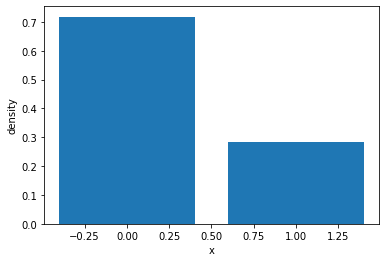

In [ ]:
samples = bernoulli_probs.sample(sample_shape=(1000,))
sample_values, sample_counts = torch.unique(samples, return_counts=True)
plt.bar(sample_values, sample_counts / 1000)
plt.xlabel("x")
plt.ylabel("density")

Probability density function

$$\mathrm{Bernoulli}(x \mid p) = p^{x} (1-p)^{1-x}$$

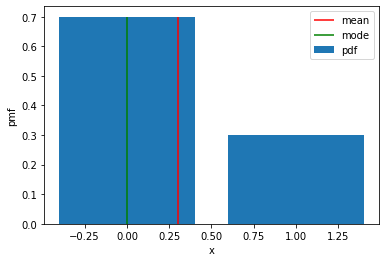

In [ ]:
# Define values of x within support
x = torch.tensor([0.0, 1.0])

# Take exponent of log_prob to get pdf
bernoulli_pdf = bernoulli_probs.log_prob(x).exp()
plt.bar(x, bernoulli_pdf, label="pdf")

# Plot mean and mode
plt.vlines(bernoulli_probs.mean, ymin=0, ymax=0.7, colors="r", label="mean")
plt.vlines(bernoulli_probs.mode, ymin=0, ymax=0.7, colors="g", label="mode")

plt.xlabel("x")
plt.ylabel("pmf")
# plt.xlim(0, 20)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
categorical_probs = dist.Categorical(probs=torch.tensor([0.3, 0.5, 0.1, 0.1]))
print(f"categorical_probs = {categorical_probs}")
print(f"support = {categorical_probs.support}  # sample values are within this support")
print("Distribution parameters:")
print(f"probs: value = {categorical_probs.probs}, constraint = {categorical_probs.arg_constraints['probs']}")
print(f"logits: value = {categorical_probs.logits}, constraint = {categorical_probs.arg_constraints['logits']}")
print("Distribution properties:")
print(f"mean = {categorical_probs.mean}               # equals to rate")
print(f"mode = {categorical_probs.mode}               # equals to rate")
print(f"standard deviation = {categorical_probs.stddev} # equals to sqrt(rate)")
print(f"variance = {categorical_probs.variance}           # equals to rate")

categorical_probs = Categorical(probs: torch.Size([4]))
support = IntegerInterval(lower_bound=0, upper_bound=3)  # sample values are within this support
Distribution parameters:
probs: value = tensor([0.3000, 0.5000, 0.1000, 0.1000]), constraint = Simplex()
logits: value = tensor([-1.2040, -0.6931, -2.3026, -2.3026]), constraint = IndependentConstraint(Real(), 1)
Distribution properties:
mean = nan               # equals to rate
mode = 1               # equals to rate
standard deviation = nan # equals to sqrt(rate)
variance = nan           # equals to rate


In [ ]:
categorical_probs = dist.Categorical(probs=torch.tensor([0.5, 1, 0.7, 0.3]))
print(f"categorical_probs = {categorical_probs}")
print(f"support = {categorical_probs.support}  # sample values are within this support")
print("Distribution parameters:")
print(f"probs: value = {categorical_probs.probs}, constraint = {categorical_probs.arg_constraints['probs']}")
print(f"logits: value = {categorical_probs.logits}, constraint = {categorical_probs.arg_constraints['logits']}")
print("Distribution properties:")
print(f"mean = {categorical_probs.mean}               # equals to rate")
print(f"mode = {categorical_probs.mode}               # equals to rate")
print(f"standard deviation = {categorical_probs.stddev} # equals to sqrt(rate)")
print(f"variance = {categorical_probs.variance}           # equals to rate")

categorical_probs = Categorical(probs: torch.Size([4]))
support = IntegerInterval(lower_bound=0, upper_bound=3)  # sample values are within this support
Distribution parameters:
probs: value = tensor([0.2000, 0.4000, 0.2800, 0.1200]), constraint = Simplex()
logits: value = tensor([-1.6094, -0.9163, -1.2730, -2.1203]), constraint = IndependentConstraint(Real(), 1)
Distribution properties:
mean = nan               # equals to rate
mode = 1               # equals to rate
standard deviation = nan # equals to sqrt(rate)
variance = nan           # equals to rate


In [ ]:
categorical_logits = dist.Categorical(logits=torch.tensor([0.5, 1, -1, 0]))
print(f"categorical_logits = {categorical_logits}")
print(f"support = {categorical_logits.support}  # sample values are within this support")
print("Distribution parameters:")
print(f"probs: value = {categorical_logits.probs}, constraint = {categorical_logits.arg_constraints['probs']}")
print(f"logits: value = {categorical_logits.logits}, constraint = {categorical_logits.arg_constraints['logits']}")
print("Distribution properties:")
print(f"mean = {categorical_logits.mean}               # equals to rate")
print(f"mode = {categorical_logits.mode}               # equals to rate")
print(f"standard deviation = {categorical_logits.stddev} # equals to sqrt(rate)")
print(f"variance = {categorical_logits.variance}           # equals to rate")

categorical_logits = Categorical(logits: torch.Size([4]))
support = IntegerInterval(lower_bound=0, upper_bound=3)  # sample values are within this support
Distribution parameters:
probs: value = tensor([0.2875, 0.4740, 0.0641, 0.1744]), constraint = Simplex()
logits: value = tensor([-1.2466, -0.7466, -2.7466, -1.7466]), constraint = IndependentConstraint(Real(), 1)
Distribution properties:
mean = nan               # equals to rate
mode = 1               # equals to rate
standard deviation = nan # equals to sqrt(rate)
variance = nan           # equals to rate


Some data creation routines do not take a shape tuple:

In [ ]:
# NumPy routines which allocate memory and fill arrays with value but do not accept shape as input argument
a = np.arange(4.);              print(f"np.arange(4.):     a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.rand(4);          print(f"np.random.rand(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

values can be specified manually as well. 

In [ ]:
# NumPy routines which allocate memory and fill with user specified values
a = np.array([5,4,3,2]);  print(f"np.array([5,4,3,2]):  a = {a},     a shape = {a.shape}, a data type = {a.dtype}")
a = np.array([5.,4,3,2]); print(f"np.array([5.,4,3,2]): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

These have all created a one-dimensional vector  `a` with four elements. `a.shape` returns the dimensions. Here we see a.shape = `(4,)` indicating a 1-d array with 4 elements.  

<a name="toc_40015_3.4"></a>
## 3.4 Operations on Distributions
Let's explore some operations using vectors.
<a name="toc_40015_3.4.1"></a>
### 3.4.1 Sampling
Elements of vectors can be accessed via indexing and slicing. NumPy provides a very complete set of indexing and slicing capabilities. We will explore only the basics needed for the course here. Reference [Slicing and Indexing](https://NumPy.org/doc/stable/reference/arrays.indexing.html) for more details.  
**Indexing** means referring to *an element* of an array by its position within the array.  
**Slicing** means getting a *subset* of elements from an array based on their indices.  
NumPy starts indexing at zero so the 3rd element of an vector $\mathbf{a}$ is `a[2]`.

In [ ]:
print(f"support = {bernoulli_probs.support}  # sample values are within this support")
sample = bernoulli_probs.sample()
print(f"sample ~ gamma: value = {sample} # run this multiple times - each time you will get different random values")

support = Boolean()  # sample values are within this support
sample ~ gamma: value = 0.0 # run this multiple times - each time you will get different random values


<BarContainer object of 2 artists>

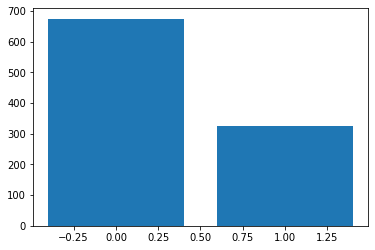

In [ ]:
samples = bernoulli_probs.sample(sample_shape=(1000,))
sample_values, sample_counts = torch.unique(samples, return_counts=True)
plt.bar(sample_values, sample_counts)

In [ ]:
print(f"support = {categorical_probs.support}  # sample values are within this support")
sample = categorical_probs.sample()
print(f"sample ~ categorical: value = {sample} # run this multiple times - each time you will get different random values")

support = IntegerInterval(lower_bound=0, upper_bound=3)  # sample values are within this support
sample ~ categorical: value = 1 # run this multiple times - each time you will get different random values


<BarContainer object of 4 artists>

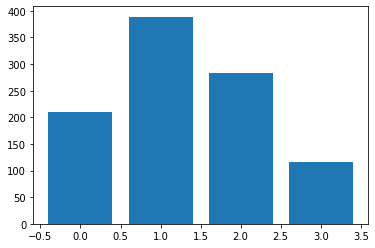

In [ ]:
samples = categorical_probs.sample(sample_shape=(1000,))
sample_values, sample_counts = torch.unique(samples, return_counts=True)
plt.bar(sample_values, sample_counts)

In [ ]:
#vector indexing operations on 1-D vectors
a = np.arange(10)
print(a)

#access an element
print(f"a[2].shape: {a[2].shape} a[2]  = {a[2]}, Accessing an element returns a scalar")

# access the last element, negative indexes count from the end
print(f"a[-1] = {a[-1]}")

#indexs must be within the range of the vector or they will produce and error
try:
    c = a[10]
except Exception as e:
    print("The error message you'll see is:")
    print(e)

<a name="toc_40015_3.4.2"></a>
### 3.4.2 Log-probability
Slicing creates an array of indices using a set of three values (`start:stop:step`). A subset of values is also valid. Its use is best explained by example:

In [ ]:
categorical_probs.support.lower_bound

0

/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


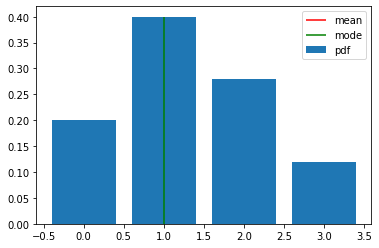

In [ ]:
x_min = categorical_probs.support.lower_bound
x_max = categorical_probs.support.upper_bound
x = torch.arange(x_min, x_max + 1)
categorical_pdf = categorical_probs.log_prob(x).exp()
plt.bar(x, categorical_pdf, label="pdf")
plt.vlines(categorical_probs.mean, ymin=0, ymax=0.4, colors="r", label="mean")
plt.vlines(categorical_probs.mode, ymin=0, ymax=0.4, colors="g", label="mode")
# plt.xlim(0, 20)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
#vector slicing operations
a = np.arange(10)
print(f"a         = {a}")

#access 5 consecutive elements (start:stop:step)
c = a[2:7:1];     print("a[2:7:1] = ", c)

# access 3 elements separated by two 
c = a[2:7:2];     print("a[2:7:2] = ", c)

# access all elements index 3 and above
c = a[3:];        print("a[3:]    = ", c)

# access all elements below index 3
c = a[:3];        print("a[:3]    = ", c)

# access all elements
c = a[:];         print("a[:]     = ", c)

<a name="toc_40015_3.4.3"></a>
### 3.4.3 Single vector operations
There are a number of useful operations that involve operations on a single vector.

In [ ]:
a = np.array([1,2,3,4])
print(f"a             : {a}")
# negate elements of a
b = -a 
print(f"b = -a        : {b}")

# sum all elements of a, returns a scalar
b = np.sum(a) 
print(f"b = np.sum(a) : {b}")

b = np.mean(a)
print(f"b = np.mean(a): {b}")

b = a**2
print(f"b = a**2      : {b}")

<a name="toc_40015_3.4.4"></a>
### 3.4.4 Vector Vector element-wise operations
Most of the NumPy arithmetic, logical and comparison operations apply to vectors as well. These operators work on an element-by-element basis. For example 
$$ c_i = a_i + b_i $$

In [ ]:
a = np.array([ 1, 2, 3, 4])
b = np.array([-1,-2, 3, 4])
print(f"Binary operators work element wise: {a + b}")

Of course, for this to work correctly, the vectors must be of the same size:

In [ ]:
#try a mismatched vector operation
c = np.array([1, 2])
try:
    d = a + c
except Exception as e:
    print("The error message you'll see is:")
    print(e)

<a name="toc_40015_3.4.5"></a>
### 3.4.5 Scalar Vector operations
Vectors can be 'scaled' by scalar values. A scalar value is just a number. The scalar multiplies all the elements of the vector.

In [ ]:
a = np.array([1, 2, 3, 4])

# multiply a by a scalar
b = 5 * a 
print(f"b = 5 * a : {b}")

<a name="toc_40015_3.4.6"></a>
### 3.4.6 Vector Vector dot product
The dot product is a mainstay of Linear Algebra and NumPy. This is an operation used extensively in this course and should be well understood. The dot product is shown below.

<img src="./images/C1_W2_Lab04_dot_notrans.gif" width=800> 

The dot product multiplies the values in two vectors element-wise and then sums the result.
Vector dot product requires the dimensions of the two vectors to be the same. 

Let's implement our own version of the dot product below:

**Using a for loop**, implement a function which returns the dot product of two vectors. The function to return given inputs $a$ and $b$:
$$ x = \sum_{i=0}^{n-1} a_i b_i $$
Assume both `a` and `b` are the same shape.

In [ ]:
def my_dot(a, b): 
    """
   Compute the dot product of two vectors
 
    Args:
      a (ndarray (n,)):  input vector 
      b (ndarray (n,)):  input vector with same dimension as a
    
    Returns:
      x (scalar): 
    """
    x=0
    for i in range(a.shape[0]):
        x = x + a[i] * b[i]
    return x

In [ ]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
print(f"my_dot(a, b) = {my_dot(a, b)}")

Note, the dot product is expected to return a scalar value. 

Let's try the same operations using `np.dot`.  

In [ ]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ") 
c = np.dot(b, a)
print(f"NumPy 1-D np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape} ")


Above, you will note that the results for 1-D matched our implementation.

<a name="toc_40015_3.4.7"></a>
### 3.4.7 The Need for Speed: vector vs for loop
We utilized the NumPy  library because it improves speed memory efficiency. Let's demonstrate:

In [ ]:
np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()  # capture start time
c = my_dot(a,b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

del(a);del(b)  #remove these big arrays from memory

So, vectorization provides a large speed up in this example. This is because NumPy makes better use of available data parallelism in the underlying hardware. GPU's and modern CPU's implement Single Instruction, Multiple Data (SIMD) pipelines allowing multiple operations to be issued in parallel. This is critical in Machine Learning where the data sets are often very large.

<a name="toc_12345_3.4.8"></a>
### 3.4.8 Vector Vector operations in Course 1
Vector Vector operations will appear frequently in course 1. Here is why:
- Going forward, our examples will be stored in an array, `X_train` of dimension (m,n). This will be explained more in context, but here it is important to note it is a 2 Dimensional array or matrix (see next section on matrices).
- `w` will be a 1-dimensional vector of shape (n,).
- we will perform operations by looping through the examples, extracting each example to work on individually by indexing X. For example:`X[i]`
- `X[i]` returns a value of shape (n,), a 1-dimensional vector. Consequently, operations involving `X[i]` are often vector-vector.  

That is a somewhat lengthy explanation, but aligning and understanding the shapes of your operands is important when performing vector operations.

In [ ]:
# show common Course 1 example
X = np.array([[1],[2],[3],[4]])
w = np.array([2])
c = np.dot(X[1], w)

print(f"X[1] has shape {X[1].shape}")
print(f"w has shape {w.shape}")
print(f"c has shape {c.shape}")

<a name="toc_40015_4"></a>
# 4 Matrices


<a name="toc_40015_4.1"></a>
## 4.1 Abstract
Matrices, are two dimensional arrays. The elements of a matrix are all of the same type. In notation, matrices are denoted with capitol, bold letter such as $\mathbf{X}$. In this and other labs, `m` is often the number of rows and `n` the number of columns. The elements of a matrix can be referenced with a two dimensional index. In math settings, numbers in the index typically run from 1 to n. In computer science and these labs, indexing will run from 0 to n-1.  
<figure>
    <center> <img src="./images/C1_W2_Lab04_Matrices.PNG"  alt='missing'  width=900><center/>
    <figcaption> Generic Matrix Notation, 1st index is row, 2nd is column </figcaption>
<figure/>

<a name="toc_40015_4.2"></a>
## 4.2 NumPy Arrays

NumPy's basic data structure is an indexable, n-dimensional *array* containing elements of the same type (`dtype`). These were described earlier. Matrices have a two-dimensional (2-D) index [m,n].

In Course 1, 2-D matrices are used to hold training data. Training data is $m$ examples by $n$ features creating an (m,n) array. Course 1 does not do operations directly on matrices but typically extracts an example as a vector and operates on that. Below you will review: 
- data creation
- slicing and indexing

<a name="toc_40015_4.3"></a>
## 4.3 Matrix Creation
The same functions that created 1-D vectors will create 2-D or n-D arrays. Here are some examples


Below, the shape tuple is provided to achieve a 2-D result. Notice how NumPy uses brackets to denote each dimension. Notice further than NumPy, when printing, will print one row per line.


In [ ]:
a = np.zeros((1, 5))                                       
print(f"a shape = {a.shape}, a = {a}")                     

a = np.zeros((2, 1))                                                                   
print(f"a shape = {a.shape}, a = {a}") 

a = np.random.random_sample((1, 1))  
print(f"a shape = {a.shape}, a = {a}") 

One can also manually specify data. Dimensions are specified with additional brackets matching the format in the printing above.

In [ ]:
# NumPy routines which allocate memory and fill with user specified values
a = np.array([[5], [4], [3]]);   print(f" a shape = {a.shape}, np.array: a = {a}")
a = np.array([[5],   # One can also
              [4],   # separate values
              [3]]); #into separate rows
print(f" a shape = {a.shape}, np.array: a = {a}")

<a name="toc_40015_4.4"></a>
## 4.4 Operations on Matrices
Let's explore some operations using matrices.

<a name="toc_40015_4.4.1"></a>
### 4.4.1 Indexing


Matrices include a second index. The two indexes describe [row, column]. Access can either return an element or a row/column. See below:

In [ ]:
#vector indexing operations on matrices
a = np.arange(6).reshape(-1, 2)   #reshape is a convenient way to create matrices
print(f"a.shape: {a.shape}, \na= {a}")

#access an element
print(f"\na[2,0].shape:   {a[2, 0].shape}, a[2,0] = {a[2, 0]},     type(a[2,0]) = {type(a[2, 0])} Accessing an element returns a scalar\n")

#access a row
print(f"a[2].shape:   {a[2].shape}, a[2]   = {a[2]}, type(a[2])   = {type(a[2])}")

It is worth drawing attention to the last example. Accessing a matrix by just specifying the row will return a *1-D vector*.

**Reshape**  
The previous example used [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to shape the array.  
`a = np.arange(6).reshape(-1, 2) `   
This line of code first created a *1-D Vector* of six elements. It then reshaped that vector into a *2-D* array using the reshape command. This could have been written:  
`a = np.arange(6).reshape(3, 2) `  
To arrive at the same 3 row, 2 column array.
The -1 argument tells the routine to compute the number of rows given the size of the array and the number of columns.


<a name="toc_40015_4.4.2"></a>
### 4.4.2 Slicing
Slicing creates an array of indices using a set of three values (`start:stop:step`). A subset of values is also valid. Its use is best explained by example:

In [ ]:
#vector 2-D slicing operations
a = np.arange(20).reshape(-1, 10)
print(f"a = \n{a}")

#access 5 consecutive elements (start:stop:step)
print("a[0, 2:7:1] = ", a[0, 2:7:1], ",  a[0, 2:7:1].shape =", a[0, 2:7:1].shape, "a 1-D array")

#access 5 consecutive elements (start:stop:step) in two rows
print("a[:, 2:7:1] = \n", a[:, 2:7:1], ",  a[:, 2:7:1].shape =", a[:, 2:7:1].shape, "a 2-D array")

# access all elements
print("a[:,:] = \n", a[:,:], ",  a[:,:].shape =", a[:,:].shape)

# access all elements in one row (very common usage)
print("a[1,:] = ", a[1,:], ",  a[1,:].shape =", a[1,:].shape, "a 1-D array")
# same as
print("a[1]   = ", a[1],   ",  a[1].shape   =", a[1].shape, "a 1-D array")


<a name="toc_40015_5.0"></a>
## Congratulations!
In this lab you mastered the features of Python and NumPy that are needed for Course 1.